In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import ttest_1samp

# Reading files

In [2]:
Cust=pd.read_csv("Customer_data1.csv")
Trans=pd.read_csv("Transcation_data1.csv")

In [3]:
Cust.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
Trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17 00:00:00.0000000,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2018-09-16 00:00:00.0000000,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,2019-03-07 00:00:00.0000000,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,2019-03-08 00:00:00.0000000,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,2018-11-02 00:00:00.0000000,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9


# merging the 2 files 

In [5]:
print(len(Cust))
print(len(Trans))

72637
264836


In [6]:
final = pd.merge(Cust, Trans, on='LYLTY_CARD_NBR', how='outer')

# Checking for Null

In [7]:
final.count()

LYLTY_CARD_NBR      264836
LIFESTAGE           264836
PREMIUM_CUSTOMER    264836
DATE                264836
STORE_NBR           264836
TXN_ID              264836
PROD_NBR            264836
PROD_NAME           264836
PROD_QTY            264836
TOT_SALES           264836
dtype: int64

In [8]:
len(final)

264836

In [9]:
print(final.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64


# Extracting values from the existing column

In [75]:
def weight(name):
    numbers = re.findall('[0-9]+',name)
    for i in numbers:
        n=int(i)
        return(n)
def typecase(num):
    return int(num)

In [76]:
W=final.PROD_NAME.apply(weight)
print(type(W))
W.head()

<class 'pandas.core.series.Series'>


0    175
1    150
2    210
3    175
4    160
Name: PROD_NAME, dtype: int64

In [12]:
final.insert(loc=8, column='Weight', value=W)

In [13]:
final.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,Weight,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17 00:00:00.0000000,1,1,5,Natural Chip Compny SeaSalt175g,175,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16 00:00:00.0000000,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,150,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07 00:00:00.0000000,1,3,52,Grain Waves Sour Cream&Chives 210G,210,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08 00:00:00.0000000,1,4,106,Natural ChipCo Hony Soy Chckn175g,175,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02 00:00:00.0000000,1,5,96,WW Original Stacked Chips 160g,160,1,1.9


In [14]:
x=final.PROD_QTY.apply(typecase)

# Finding Outliers

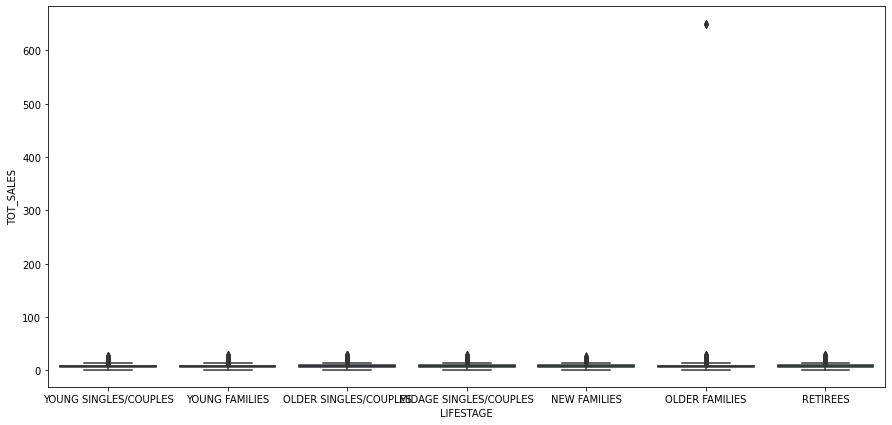

In [15]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LIFESTAGE',y='TOT_SALES',data=final,palette='winter')
plt.show()

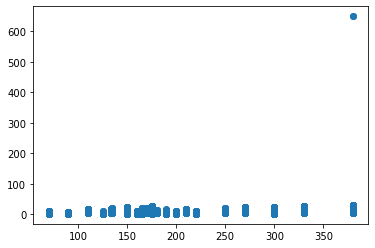

In [16]:
x=final.Weight
y=final.TOT_SALES
plt.scatter(x, y)
plt.show()

# Handling Outliers

In [17]:
final1=final.copy()
final1.count()

LYLTY_CARD_NBR      264836
LIFESTAGE           264836
PREMIUM_CUSTOMER    264836
DATE                264836
STORE_NBR           264836
TXN_ID              264836
PROD_NBR            264836
PROD_NAME           264836
Weight              264836
PROD_QTY            264836
TOT_SALES           264836
dtype: int64

In [18]:
final1[final1['TOT_SALES']>50]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,Weight,PROD_QTY,TOT_SALES
221625,226000,OLDER FAMILIES,Premium,2018-08-19 00:00:00.0000000,226,226201,4,Dorito Corn Chp Supreme 380g,380,200,650.0
221626,226000,OLDER FAMILIES,Premium,2019-05-20 00:00:00.0000000,226,226210,4,Dorito Corn Chp Supreme 380g,380,200,650.0


In [19]:
final1.drop(final1[final1['PROD_QTY'] ==200].index, inplace = True)

In [20]:
final1.count()

LYLTY_CARD_NBR      264834
LIFESTAGE           264834
PREMIUM_CUSTOMER    264834
DATE                264834
STORE_NBR           264834
TXN_ID              264834
PROD_NBR            264834
PROD_NAME           264834
Weight              264834
PROD_QTY            264834
TOT_SALES           264834
dtype: int64

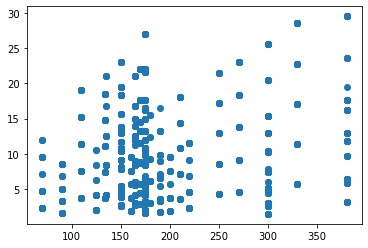

In [21]:
x=final1.Weight
y=final1.TOT_SALES
plt.scatter(x, y)
plt.show()

In [22]:
final1.shape

(264834, 11)

In [23]:
final1['MONTH'] = pd.DatetimeIndex(final1['DATE']).month
final1.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,Weight,PROD_QTY,TOT_SALES,MONTH
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17 00:00:00.0000000,1,1,5,Natural Chip Compny SeaSalt175g,175,2,6.0,10
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16 00:00:00.0000000,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,150,1,2.7,9
2,1003,YOUNG FAMILIES,Budget,2019-03-07 00:00:00.0000000,1,3,52,Grain Waves Sour Cream&Chives 210G,210,1,3.6,3
3,1003,YOUNG FAMILIES,Budget,2019-03-08 00:00:00.0000000,1,4,106,Natural ChipCo Hony Soy Chckn175g,175,1,3.0,3
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02 00:00:00.0000000,1,5,96,WW Original Stacked Chips 160g,160,1,1.9,11


In [24]:
TC1=final1.loc[(final1['DATE']<'2019-02-01') | (final1['DATE']>='2019-05-01')]
TC1

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,Weight,PROD_QTY,TOT_SALES,MONTH
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17 00:00:00.0000000,1,1,5,Natural Chip Compny SeaSalt175g,175,2,6.0,10
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16 00:00:00.0000000,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,150,1,2.7,9
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02 00:00:00.0000000,1,5,96,WW Original Stacked Chips 160g,160,1,1.9,11
5,1005,MIDAGE SINGLES/COUPLES,Mainstream,2018-12-28 00:00:00.0000000,1,6,86,Cheetos Puffs 165g,165,1,2.8,12
6,1007,YOUNG SINGLES/COUPLES,Budget,2018-12-04 00:00:00.0000000,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,110,1,3.8,12
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2370701,YOUNG FAMILIES,Mainstream,2018-12-08 00:00:00.0000000,88,240378,24,Grain Waves Sweet Chilli 210g,210,2,7.2,12
264832,2370751,YOUNG FAMILIES,Premium,2018-10-01 00:00:00.0000000,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,150,2,9.2,10
264833,2370961,OLDER FAMILIES,Budget,2018-10-24 00:00:00.0000000,88,240480,70,Tyrrells Crisps Lightly Salted 165g,165,2,8.4,10
264834,2370961,OLDER FAMILIES,Budget,2018-10-27 00:00:00.0000000,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,300,2,10.2,10


In [25]:
TC2=final1.loc[(final1['DATE']>='2019-02-01') & (final1['DATE']<'2019-05-01')]
TC2

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,Weight,PROD_QTY,TOT_SALES,MONTH
2,1003,YOUNG FAMILIES,Budget,2019-03-07 00:00:00.0000000,1,3,52,Grain Waves Sour Cream&Chives 210G,210,1,3.6,3
3,1003,YOUNG FAMILIES,Budget,2019-03-08 00:00:00.0000000,1,4,106,Natural ChipCo Hony Soy Chckn175g,175,1,3.0,3
15,1012,OLDER FAMILIES,Mainstream,2019-03-15 00:00:00.0000000,1,16,20,Doritos Cheese Supreme 330g,330,1,5.7,3
17,1013,RETIREES,Budget,2019-03-04 00:00:00.0000000,1,18,93,Doritos Corn Chip Southern Chicken 150g,150,1,3.9,3
18,1013,RETIREES,Budget,2019-03-07 00:00:00.0000000,1,19,91,CCs Tasty Cheese 175g,175,2,4.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
264765,272374,OLDER SINGLES/COUPLES,Premium,2019-04-24 00:00:00.0000000,272,270182,26,Pringles Sweet&Spcy BBQ 134g,134,2,7.4,4
264773,272381,OLDER SINGLES/COUPLES,Budget,2019-02-08 00:00:00.0000000,272,270190,30,Doritos Corn Chips Cheese Supreme 170g,170,2,8.8,2
264777,272382,OLDER SINGLES/COUPLES,Premium,2019-02-18 00:00:00.0000000,272,270194,32,Kettle Sea Salt And Vinegar 175g,175,2,10.8,2
264785,272389,YOUNG SINGLES/COUPLES,Mainstream,2019-04-01 00:00:00.0000000,272,270202,62,Pringles Mystery Flavour 134g,134,2,7.4,4


# Finding the Correlations

In [26]:
#finding the stores with less then 9 months of data 
list=[]
table1=TC1.groupby(['STORE_NBR','MONTH']).agg({'MONTH':'nunique'})
out=table1[['MONTH']]
for i in out.groupby(level=0):
    #print(i)
    a=pd.DataFrame(i[1])
    if len(a.MONTH)<9:
        b=a.index.unique(0)
        list.append(b[0])
print(list)
print(len(list))

[11, 31, 44, 76, 85, 117, 193, 206, 211, 218, 252]
11


In [27]:
#grouping the store values during the Trail Period
table=TC2.groupby(['STORE_NBR','MONTH']).agg({'TOT_SALES':'sum','LYLTY_CARD_NBR':'nunique','TXN_ID':'count'})
TG_month=table[['TOT_SALES','LYLTY_CARD_NBR','TXN_ID']]
TG_month

TOT_SALES  LYLTY_CARD_NBR  TXN_ID
STORE_NBR MONTH                                   
1         2          225.4              52      55
          3          192.9              45      49
          4          192.9              42      43
2         2          139.4              29      32
          3          192.1              43      46
...                    ...             ...     ...
271       3          735.8              79     101
          4          774.6              87     109
272       2          395.5              45      48
          3          442.3              50      53
          4          445.1              54      56

[794 rows x 3 columns]

In [28]:
#grouping the store values Pre-Trail Period
table=TC1.groupby(['STORE_NBR','MONTH']).agg({'TOT_SALES':'sum','LYLTY_CARD_NBR':'nunique','TXN_ID':'count'})
G_month=table[['TOT_SALES','LYLTY_CARD_NBR','TXN_ID']]
G_month

TOT_SALES  LYLTY_CARD_NBR  TXN_ID
STORE_NBR MONTH                                   
1         1         154.80              35      36
          5         221.40              46      51
          6         174.10              42      43
          7         206.90              49      52
          8         176.10              42      43
...                    ...             ...     ...
272       8         372.85              44      48
          9         304.70              32      36
          10        430.60              44      51
          11        376.20              41      45
          12        403.90              47      47

[2375 rows x 3 columns]

In [29]:
#Trail store 1
Tstore1=G_month.loc[77]
print(Tstore1)

       TOT_SALES  LYLTY_CARD_NBR  TXN_ID
MONTH                                   
1          204.4              35      39
5          299.3              55      56
6          264.7              41      42
7          296.8              51      55
8          255.5              47      48
9          225.2              42      44
10         204.5              37      38
11         245.3              41      44
12         267.3              46      49


In [30]:
#Trail store 2
Tstore2=G_month.loc[86]
print(Tstore2)

       TOT_SALES  LYLTY_CARD_NBR  TXN_ID
MONTH                                   
1         841.40              94     130
5         889.30             104     129
6         838.00              98     119
7         892.20              99     126
8         764.05              94     112
9         914.60             103     129
10        948.40             109     138
11        918.00             100     127
12        841.20              98     120


In [31]:
#Trail store 3
Tstore3=G_month.loc[88]
print(Tstore3)

       TOT_SALES  LYLTY_CARD_NBR  TXN_ID
MONTH                                   
1        1266.40             117     146
5        1308.25             128     155
6        1354.60             121     150
7        1310.00             129     153
8        1323.80             131     160
9        1423.00             124     159
10       1352.40             123     158
11       1382.80             130     157
12       1325.20             126     149


In [32]:
G_plot=G_month.copy()
G_month1=G_month.copy()

In [33]:
G_plot=G_month.copy()
G_plot

TOT_SALES  LYLTY_CARD_NBR  TXN_ID
STORE_NBR MONTH                                   
1         1         154.80              35      36
          5         221.40              46      51
          6         174.10              42      43
          7         206.90              49      52
          8         176.10              42      43
...                    ...             ...     ...
272       8         372.85              44      48
          9         304.70              32      36
          10        430.60              44      51
          11        376.20              41      45
          12        403.90              47      47

[2375 rows x 3 columns]

In [34]:
#droping the vaules of store 77,86,88
a=[77,86,88]
G_month1.drop(a, level=0, axis=0,inplace=True)

In [35]:
#dropping the values of inavlid months stored in "list"
G_month1.drop(list, level=0, axis=0,inplace=True)
G_month1

TOT_SALES  LYLTY_CARD_NBR  TXN_ID
STORE_NBR MONTH                                   
1         1         154.80              35      36
          5         221.40              46      51
          6         174.10              42      43
          7         206.90              49      52
          8         176.10              42      43
...                    ...             ...     ...
272       8         372.85              44      48
          9         304.70              32      36
          10        430.60              44      51
          11        376.20              41      45
          12        403.90              47      47

[2313 rows x 3 columns]

In [36]:
def calculate_cor(Trail_store):
    cor_m1=[]
    cor_m2=[]
    cor_m3=[]
    list1=[]
    Tstore=Trail_store
    df = pd.DataFrame()
    for i in G_month1.groupby(level=0):
        a=pd.DataFrame(i[1])
        #this below code is for metric 1
        cm1=a['TOT_SALES'].tolist()
        tm1=Tstore['TOT_SALES'].tolist()
        r1=(np.corrcoef(cm1,tm1)[0,1])
        cor_m1.append(r1)

        #this below code is for metric 2
        cm2=a['LYLTY_CARD_NBR'].tolist()
        tm2=Tstore['LYLTY_CARD_NBR'].tolist()
        r2=(np.corrcoef(cm2,tm2)[0,1])
        cor_m2.append(r2)

        #this below code is for metric 3
        cm3=a['TOT_SALES'].tolist()
        tm3=Tstore['TOT_SALES'].tolist()
        r3=(np.corrcoef(cm3,tm3)[0,1])
        cor_m3.append(r3)

        #this is colleting the index of the dataframe
        b=a.index.unique(0)
        list1.append(b[0])

    print(len(list1))
    #df=pd.DataFrame({'Cor_metric1' : [cor_m1],'Cor_metric2' : [cor_m2],'Cor_metric3' : [cor_m3] }, index=b, columns=['Cor_metric1','Cor_metric2','Cor_metric3'])
    df['Store_No']=list1
    df['Cor_metric1'] = cor_m1
    df['Cor_metric2'] = cor_m2
    df['Cor_metric3'] = cor_m3
    df['Average']=(df['Cor_metric1']+df['Cor_metric2']+df['Cor_metric3'])/3
    return(df)

# Correlations for store 77

In [37]:
df_77=calculate_cor(Tstore1)
df_77.sort_values(by='Average',ascending=False).head().reset_index()

257


,index,Store_No,Cor_metric1,Cor_metric2,Cor_metric3,Average
0,218,233,0.880004,0.994132,0.880004,0.918047
1,38,41,0.836940,0.799126,0.836940,0.824336
2,78,84,0.777507,0.876067,0.777507,0.810360
3,105,115,0.715956,0.839229,0.715956,0.757047
4,156,167,0.725318,0.814820,0.725318,0.755152


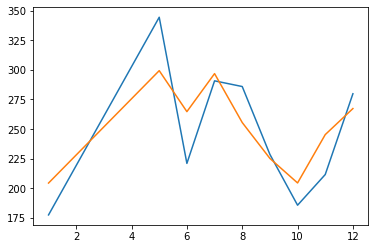

In [38]:
x=G_plot.loc[233].TOT_SALES
y=G_plot.loc[77].TOT_SALES
plt.plot(x)
plt.plot(y)

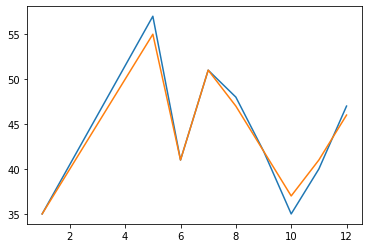

In [39]:
x=G_plot.loc[233].LYLTY_CARD_NBR
y=G_plot.loc[77].LYLTY_CARD_NBR
plt.plot(x)
plt.plot(y)

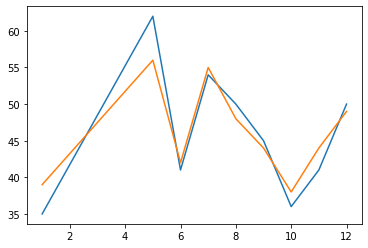

In [40]:
x=G_plot.loc[233].TXN_ID
y=G_plot.loc[77].TXN_ID
plt.plot(x)
plt.plot(y)

# Correlations for store 86

In [41]:
df_86=calculate_cor(Tstore2)
df_86.sort_values(by='Average',ascending=False).head().reset_index()

257


,index,Store_No,Cor_metric1,Cor_metric2,Cor_metric3,Average
0,144,155,0.885236,0.930845,0.885236,0.900439
1,225,240,0.814900,0.618404,0.814900,0.749401
2,244,260,0.668425,0.833410,0.668425,0.723420
3,5,6,0.734499,0.597523,0.734499,0.688841
4,121,132,0.646262,0.629340,0.646262,0.640621


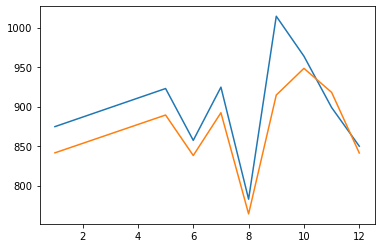

In [42]:
x=G_plot.loc[155].TOT_SALES
y=G_plot.loc[86].TOT_SALES
plt.plot(x)
plt.plot(y)

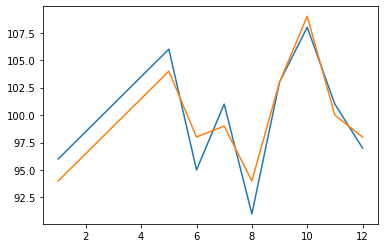

In [43]:
x=G_plot.loc[155].LYLTY_CARD_NBR
y=G_plot.loc[86].LYLTY_CARD_NBR
plt.plot(x)
plt.plot(y)

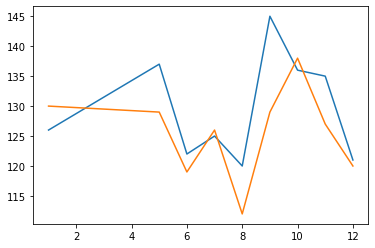

In [44]:
x=G_plot.loc[155].TXN_ID
y=G_plot.loc[86].TXN_ID
plt.plot(x)
plt.plot(y)

# Correlations for store 88

In [45]:
df_88=calculate_cor(Tstore3)
df_88.sort_values(by='Average',ascending=False).head().reset_index()

257


,index,Store_No,Cor_metric1,Cor_metric2,Cor_metric3,Average
0,123,134,0.870708,0.338051,0.870708,0.693155
1,148,159,0.901912,0.140220,0.901912,0.648015
2,176,187,0.619833,0.604224,0.619833,0.614630
3,150,161,0.653020,0.534989,0.653020,0.613676
4,12,14,0.632443,0.533647,0.632443,0.599511


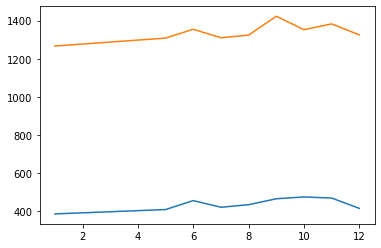

In [46]:
x=G_plot.loc[134].TOT_SALES
y=G_plot.loc[88].TOT_SALES
plt.plot(x)
plt.plot(y)

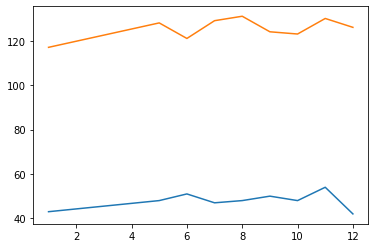

In [47]:
x=G_plot.loc[134].LYLTY_CARD_NBR
y=G_plot.loc[88].LYLTY_CARD_NBR
plt.plot(x)
plt.plot(y)

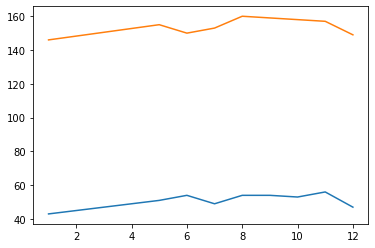

In [48]:
x=G_plot.loc[134].TXN_ID
y=G_plot.loc[88].TXN_ID
plt.plot(x)
plt.plot(y)

# Hypothesis Testing

### Functions

In [49]:
def difference(cols):
    a=cols[0]
    b=cols[1]
    dif=(a-b)/b
    return abs(dif*100)


def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
#a is the smaple mean(i.e different percentage of each sample)
#b is the standard devation. FYI rest of the values in this formula is ignored because of the Null Hypothesis
def t_value(a,b):
    return round((a/b),4)

def basefactor(T_S,C_S,T_S1,C_S1):
    Pre_T=pd.DataFrame()
    a=T_S['TOT_SALES']
    b=C_S['TOT_SALES']
    On_T=pd.DataFrame()
    a1=T_S1['TOT_SALES']
    b1=C_S1['TOT_SALES']
    AS=sum(a)+sum(a1)
    BS=sum(b)+sum(b1)
    factor=round((AS/BS),4)
    print(factor)
    return factor,a,b,a1,b1

def multifactor(a,b,factor):
    Pre_T=pd.DataFrame()
    Pre_T['Scaled_TS']=a
    Pre_T['Scaled_CS']=b*factor
    return(Pre_T)

## Store 77 and 233

In [50]:
#Pre-trail period
T_S=G_month.loc[77]
C_S=G_month.loc[233]

In [51]:
#during the Trial period
T_S1=TG_month.loc[77]
C_S1=TG_month.loc[233]

In [52]:
'''Pre_T=pd.DataFrame()
a=T_S['TOT_SALES']
b=C_S['TOT_SALES']
On_T=pd.DataFrame()
a1=T_S1['TOT_SALES']
b1=C_S1['TOT_SALES']
AS=sum(a)+sum(a1)
BS=sum(b)+sum(b1)
factor=round((AS/BS),2)
print(factor)'''
factor,a,b,a1,b1=basefactor(T_S,C_S,T_S1,C_S1)

1.0754


In [53]:
'''Pre_T=pd.DataFrame()
Pre_T['Scaled_TS']=a
Pre_T['Scaled_CS']=b*factor'''
Pre_T=multifactor(a,b,factor)
print(Pre_T)

       Scaled_TS  Scaled_CS
MONTH                      
1          204.4  190.88350
5          299.3  370.36776
6          264.7  237.66340
7          296.8  312.61878
8          255.5  307.45686
9          225.2  245.83644
10         204.5  199.70178
11         245.3  227.55464
12         267.3  300.89692


In [54]:
PreT_scaled = pd.DataFrame(Pre_T,columns=['Scaled_TS', 'Scaled_CS'])
#PreT_scaled=z_score(PreT_scaled)
PreT_scaled=PreT_scaled[[ "Scaled_TS", "Scaled_CS"]]
PreT_scaled['Per-diff']=PreT_scaled[['Scaled_TS','Scaled_CS']].apply(difference,axis=1)
stand_Dev=(PreT_scaled['Per-diff'].std())/100
PreT_scaled

,Scaled_TS,Scaled_CS,Per-diff
MONTH,,,
1,204.4,190.88350,7.081021
5,299.3,370.36776,19.188430
6,264.7,237.66340,11.376005
7,296.8,312.61878,5.060086
8,255.5,307.45686,16.898911
9,225.2,245.83644,8.394378
10,204.5,199.70178,2.402693
11,245.3,227.55464,7.798285
12,267.3,300.89692,11.165591


In [55]:
'''On_T['Scaled_TS']=a1
On_T['Scaled_CS']=b1*factor'''
On_T=multifactor(a1,b1,factor)
print(On_T)

       Scaled_TS  Scaled_CS
MONTH                      
2          235.0  262.39760
3          278.5  214.11214
4          263.5  170.55844


In [56]:
OnT_scaled = pd.DataFrame(On_T,columns=['Scaled_TS', 'Scaled_CS'])
#OnT_scaled=z_score(OnT_scaled)
OnT_scaled=OnT_scaled[[ "Scaled_TS", "Scaled_CS"]]
OnT_scaled['Per-diff']=OnT_scaled[['Scaled_TS','Scaled_CS']].apply(difference,axis=1)
OnT_scaled

,Scaled_TS,Scaled_CS,Per-diff
MONTH,,,
2,235.0,262.39760,10.441254
3,278.5,214.11214,30.072027
4,263.5,170.55844,54.492501


## Hypothesis

### H(0)- There is NO significant difference between the Trail and Control Store
### H(1)- There is significant difference in the Trail and Control store

In [57]:
List=[]
for i in OnT_scaled['Per-diff']:
    t=t_value((i/100),stand_Dev)
    List.append(t)
OnT_scaled['T-value']=List
OnT_scaled

,Scaled_TS,Scaled_CS,Per-diff,T-value
MONTH,,,,
2,235.0,262.39760,10.441254,1.9335
3,278.5,214.11214,30.072027,5.5687
4,263.5,170.55844,54.492501,10.0908


In [58]:
Pre_Tvalue=PreT_scaled['Per-diff']/100
On_Tvalue=OnT_scaled['Per-diff']/100
ttest,pval = stats.ttest_ind(Pre_Tvalue, On_Tvalue)
print('The P-value of Pre sales ',pval)
print('The T-value of Pre sales ',ttest)

The P-value of Pre sales  0.014102582023341189
The T-value of Pre sales  -2.9676417076966004


### Conclusion-  We reject the null hypothesis H(0). We conclude that there is a significant Increase in sales during the Pre-Trail period and Trial period for store number 77

## Store 86 and 155

In [59]:
#Pre-trail period
T_S=G_month.loc[86]
C_S=G_month.loc[155]

In [60]:
#during the Trial period
T_S1=TG_month.loc[86]
C_S1=TG_month.loc[155]

In [61]:
factor,a,b,a1,b1=basefactor(T_S,C_S,T_S1,C_S1)
Pre_T=multifactor(a,b,factor)
print(Pre_T)

1.0006
       Scaled_TS   Scaled_CS
MONTH                       
1         841.40   875.12476
5         889.30   923.40371
6         838.00   857.71432
7         892.20   925.15476
8         764.05   783.16962
9         914.60  1015.00864
10        948.40   964.37828
11        918.00   899.33928
12        841.20   850.30988


In [62]:
PreT_scaled = pd.DataFrame(Pre_T,columns=['Scaled_TS', 'Scaled_CS'])
#PreT_scaled=z_score(PreT_scaled)
PreT_scaled=PreT_scaled[[ "Scaled_TS", "Scaled_CS"]]
PreT_scaled['Per-diff']=PreT_scaled[['Scaled_TS','Scaled_CS']].apply(difference,axis=1)
stand_Dev=(PreT_scaled['Per-diff'].std())/100
PreT_scaled

,Scaled_TS,Scaled_CS,Per-diff
MONTH,,,
1,841.40,875.12476,3.853709
5,889.30,923.40371,3.693261
6,838.00,857.71432,2.298472
7,892.20,925.15476,3.562081
8,764.05,783.16962,2.441313
9,914.60,1015.00864,9.892393
10,948.40,964.37828,1.656848
11,918.00,899.33928,2.074937
12,841.20,850.30988,1.071360


In [63]:
On_T=multifactor(a1,b1,factor)
On_T

,Scaled_TS,Scaled_CS
MONTH,,
2,913.2,891.73472
3,1026.8,804.88264
4,848.2,845.10676


In [64]:
OnT_scaled = pd.DataFrame(On_T,columns=['Scaled_TS', 'Scaled_CS'])
#OnT_scaled=z_score(OnT_scaled)
OnT_scaled=OnT_scaled[[ "Scaled_TS", "Scaled_CS"]]
OnT_scaled['Per-diff']=OnT_scaled[['Scaled_TS','Scaled_CS']].apply(difference,axis=1)
OnT_scaled

,Scaled_TS,Scaled_CS,Per-diff
MONTH,,,
2,913.2,891.73472,2.407137
3,1026.8,804.88264,27.571394
4,848.2,845.10676,0.366018


# Hypothesis

### H(0)- There is NO significant difference between the Trail and Control Store
### H(1)- There is significant difference in the Trail and Control store

In [65]:
List=[]
for i in OnT_scaled['Per-diff']:
    t=t_value((i/100),stand_Dev)
    List.append(t)
OnT_scaled['T-value']=List
OnT_scaled

,Scaled_TS,Scaled_CS,Per-diff,T-value
MONTH,,,,
2,913.2,891.73472,2.407137,0.9196
3,1026.8,804.88264,27.571394,10.5327
4,848.2,845.10676,0.366018,0.1398


In [66]:
Pre_Tvalue=PreT_scaled['Per-diff']/100
On_Tvalue=OnT_scaled['Per-diff']/100
ttest,pval = stats.ttest_ind(Pre_Tvalue, On_Tvalue)
print('The P-value of Pre sales ',pval)
print('The T-value of Pre sales ',ttest)

The P-value of Pre sales  0.18997020574196957
The T-value of Pre sales  -1.4061980396303297


### Conclusion- We accept the Null hypothesis, since there is NO significant Increase in sales during the trail period in store 86

# Store 88 and 134

In [67]:
#Pre-trail period
T_S=G_month.loc[88]
C_S=G_month.loc[134]

In [68]:
#during the Trial period
T_S1=TG_month.loc[88]
C_S1=TG_month.loc[134]

In [69]:
factor,a,b,a1,b1=basefactor(T_S,C_S,T_S1,C_S1)
Pre_T=multifactor(a,b,factor)
print(Pre_T)

3.1133
       Scaled_TS    Scaled_CS
MONTH                        
1        1266.40  1196.129860
5        1308.25  1267.424430
6        1354.60  1414.060860
7        1310.00  1305.095360
8        1323.80  1346.969245
9        1423.00  1443.948540
10       1352.40  1473.836220
11       1382.80  1455.779080
12       1325.20  1287.038220


In [70]:
PreT_scaled = pd.DataFrame(Pre_T,columns=['Scaled_TS', 'Scaled_CS'])
#PreT_scaled=z_score(PreT_scaled)
PreT_scaled=PreT_scaled[[ "Scaled_TS", "Scaled_CS"]]
PreT_scaled['Per-diff']=PreT_scaled[['Scaled_TS','Scaled_CS']].apply(difference,axis=1)
stand_Dev=(PreT_scaled['Per-diff'].std())/100
PreT_scaled

,Scaled_TS,Scaled_CS,Per-diff
MONTH,,,
1,1266.40,1196.129860,5.874792
5,1308.25,1267.424430,3.221144
6,1354.60,1414.060860,4.204972
7,1310.00,1305.095360,0.375807
8,1323.80,1346.969245,1.720102
9,1423.00,1443.948540,1.450782
10,1352.40,1473.836220,8.239465
11,1382.80,1455.779080,5.013060
12,1325.20,1287.038220,2.965085


In [71]:
On_T=multifactor(a1,b1,factor)
On_T

,Scaled_TS,Scaled_CS
MONTH,,
2,1370.2,1082.18308
3,1477.2,1209.82838
4,1439.4,1851.16818


In [72]:
OnT_scaled = pd.DataFrame(On_T,columns=['Scaled_TS', 'Scaled_CS'])
#OnT_scaled=z_score(OnT_scaled)
OnT_scaled=OnT_scaled[[ "Scaled_TS", "Scaled_CS"]]
OnT_scaled['Per-diff']=OnT_scaled[['Scaled_TS','Scaled_CS']].apply(difference,axis=1)
OnT_scaled

,Scaled_TS,Scaled_CS,Per-diff
MONTH,,,
2,1370.2,1082.18308,26.614436
3,1477.2,1209.82838,22.099963
4,1439.4,1851.16818,22.243694


# Hypothesis

### H(0)- There is NO significant difference between the Trail and Control Store
### H(1)- There is significant difference in the Trail and Control store

In [73]:
List=[]
for i in OnT_scaled['Per-diff']:
    t=t_value((i/100),stand_Dev)
    List.append(t)
OnT_scaled['T-value']=List
OnT_scaled

,Scaled_TS,Scaled_CS,Per-diff,T-value
MONTH,,,,
2,1370.2,1082.18308,26.614436,10.8531
3,1477.2,1209.82838,22.099963,9.0121
4,1439.4,1851.16818,22.243694,9.0707


In [74]:
Pre_Tvalue=PreT_scaled['Per-diff']/100
On_Tvalue=OnT_scaled['Per-diff']/100
ttest,pval = stats.ttest_ind(Pre_Tvalue, On_Tvalue)
print('The P-value of Pre sales ',pval)
print('The T-value of Pre sales ',ttest)

The P-value of Pre sales  2.688609208855565e-07
The T-value of Pre sales  -12.106376342597311


### Conclusion- We reject the null hypothesis H(0). We conclude that there is a significant Increase in sales during the Pre-Trail period and Trial period for store number 88